<a href="https://colab.research.google.com/github/ReenuSonare/Internship_Project/blob/main/NLP_Based_E_Commerce_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Setup and Data Preparation**

**Install NLTK Data:**

In [14]:
import nltk
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Load and Process Intents File:**

In [15]:
import json
import pickle
import numpy as np
import random
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Load intents file
with open('intents.json') as file:
    intents = json.load(file)


**Intents**

In [16]:
intents

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi', 'Hey', 'Is anyone there?', 'Hello', 'Good day'],
   'responses': ['Hey :-) My name is Daz!',
    'Hello, thanks for visiting. My name is Daz!',
    'Hi there, My name is Daz!. What can I do for you?',
    'Hi there, My name is Daz! How can I help?']},
  {'tag': 'personal',
   'patterns': ['How are you?', 'How are you doing?', 'How is your day?'],
   'responses': ["I'm good, all's good, thanks. How about you?"]},
  {'tag': 'user response',
   'patterns': ["I'm good",
    'Im good',
    'Im doing good',
    'I am good',
    'I am okay'],
   'responses': ['Great to hear you are doing good.']},
  {'tag': 'goodbye',
   'patterns': ['Bye', 'See you later', 'Goodbye'],
   'responses': ['See you later, thanks for visiting. Hope I was able to help!',
    'Have a nice day. Hope I was able to help!']},
  {'tag': 'thanks',
   'patterns': ['Thanks',
    'Thank you',
    "That's helpful",
    "Thank's a lot!",
    'thx',
    'thnks'],
   'respon

**Initialize Variables:**


In [17]:
# Initialize variables
words = []
classes = []
documents = []
ignore_words = ['?', '!']

# Tokenize and lemmatize each pattern in the intents file
for intent in intents['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# Lemmatize, lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(set(words))

# Sort classes
classes = sorted(set(classes))

# Print information about the data
print(f"{len(documents)} documents")
print(f"{len(classes)} classes: {classes}")
print(f"{len(words)} unique lemmatized words: {words}")

# Save words and classes
pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))


126 documents
23 classes: ['cancel', 'confirm', 'delay', 'delivery', 'goodbye', 'greeting', 'help', 'items', 'mobile app', 'more', 'order status', 'payments', 'personal', 'profile info', 'reasons', 'refund', 'refund status', 'return', 'thanks', 'track', 'use voucher', 'user response', 'withdraw refunds']
161 unique lemmatized words: ["'m", "'s", '.', 'a', 'about', 'accept', 'account', 'address', 'agent', 'am', 'an', 'any', 'anyone', 'app', 'application', 'are', 'assist', 'assistance', 'available', 'be', 'become', 'but', 'buy', 'bye', 'call', 'can', 'cancel', 'cancelation', 'cancellation', 'cancelled', 'card', 'cash', 'change', 'check', 'common', 'completed', 'confirmation', 'confirmed', 'contact', 'credit', 'credited', 'customer', 'day', 'deducted', 'delay', 'delayed', 'delete', 'delivered', 'delivery', 'did', 'do', 'doe', 'doing', 'download', 'edit', 'even', 'for', 'from', 'fund', 'get', 'good', 'goodbye', 'have', 'hello', 'help', 'helpful', 'helpline', 'hey', 'hi', 'how', 'i', 'im', 

**Create Training Data:**

In [18]:
# Create training data
training = []
output_empty = [0] * len(classes)

for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1 if w in pattern_words else 0)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])


# Shuffle the data and convert to numpy arrays
random.shuffle(training)
training = np.array(training, dtype=object)

train_x = np.array([i[0] for i in training])
train_y = np.array([i[1] for i in training])

print("Training data created")
print("Shape of train_x:", train_x.shape)
print("Shape of train_y:", train_y.shape)


Training data created
Shape of train_x: (126, 161)
Shape of train_y: (126, 23)


**Step 2: Build and Train the Model**

Define and Compile Model:

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Calculate input & output shape based on the length of label vectors
input_shape = len(train_x[0])
output_shape = len(train_y[0])


#  Define LSTM model
model = Sequential()
model.add(Dense(128, input_shape=(input_shape,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output_shape, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


**Train the Model:**

In [20]:
# Train model
history = model.fit(np.array(train_x), np.array(train_y), epochs=100, batch_size=5, verbose=1)

# Save model
model.save('chatbot_model.h5')

print("Model created and saved")


Epoch 1/100
26/26 [==============================] - 1s 4ms/step - loss: 3.1244 - accuracy: 0.0317
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 3.0829 - accuracy: 0.0873
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 3.0546 - accuracy: 0.1190
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 2.9662 - accuracy: 0.1508
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 2.8744 - accuracy: 0.1746
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 2.8245 - accuracy: 0.2222
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 2.7134 - accuracy: 0.2857
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 2.6146 - accuracy: 0.2619
Epoch 9/100
26/26 [==============================] - 0s 3ms/step - loss: 2.5004 - accuracy: 0.2619
Epoch 10/100
26/26 [==============================] - 0s 3ms/step - loss: 2.3829 - accuracy: 0.3254
Epoch 11/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Step 3: Analyze and Visualize Data**

Analyze Intent Distribution:

In [21]:
def count_intents(documents):
    intent_counts = {}
    for document in documents:
        intent = document[1]
        if intent in intent_counts:
            intent_counts[intent] += 1
        else:
            intent_counts[intent] = 1
    return intent_counts

intent_counts = count_intents(documents)

for intent, count in intent_counts.items():
    print(f"{intent}: {count}")


greeting: 5
personal: 3
user response: 5
goodbye: 3
thanks: 6
items: 5
payments: 6
track: 4
delivery: 5
confirm: 4
delay: 4
reasons: 4
more: 12
cancel: 6
refund: 6
refund status: 7
return: 6
withdraw refunds: 5
order status: 5
use voucher: 4
profile info: 9
mobile app: 5
help: 7


Visualize Intent Distribution:

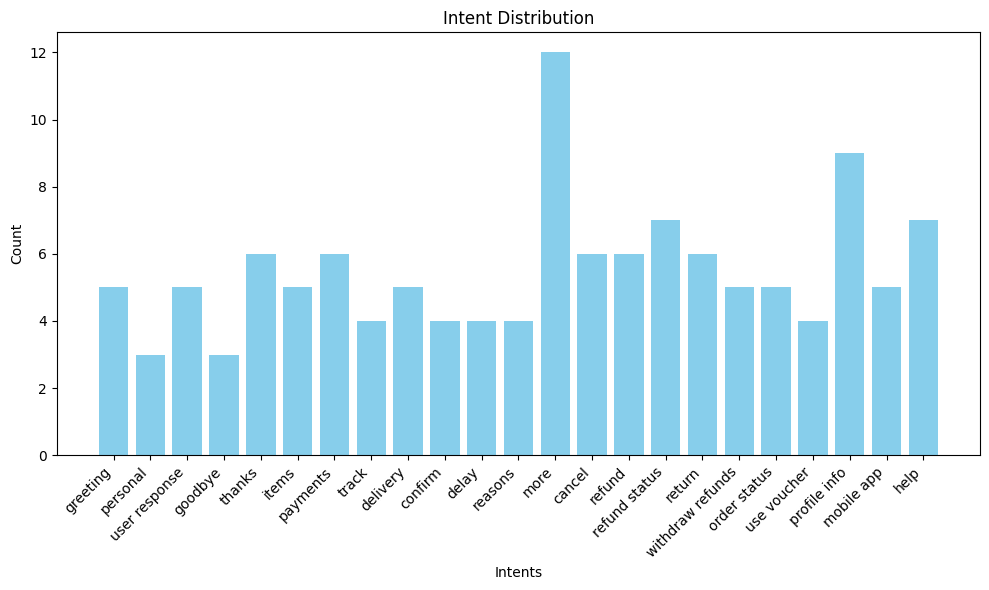

In [22]:
import matplotlib.pyplot as plt

def visualize_intent_distribution(intent_counts):
    intents = list(intent_counts.keys())
    counts = list(intent_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(intents, counts, color='skyblue')
    plt.xlabel('Intents')
    plt.ylabel('Count')
    plt.title('Intent Distribution')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

visualize_intent_distribution(intent_counts)


**Step 4: Implement Chat Functionality**

Define Functions for Predicting and Responding:

In [ ]:
def predict_class(sentence, model):
  # Clean up sentence
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    # Generate bag of words
    bag = [0] * len(words)
    for s in sentence_words:
        for i, w in enumerate(words):
            if w == s:
                bag[i] = 1

    # Predict class
    result = model.predict(np.array([bag]))[0]

    # Filter out predictions below a threshold
    ERROR_THRESHOLD = 0.25
    results = [[i, r] for i, r in enumerate(result) if r > ERROR_THRESHOLD]
    # Sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    if results:
        return_list = [{'intent': classes[r[0]], 'probability': str(r[1])} for r in results]
    else:
        return_list = []
    return return_list

def get_response(intents_list, intents_json):
    if intents_list:
        tag = intents_list[0]['intent']
        list_of_intents = intents_json['intents']
        for i in list_of_intents:
            if i['tag'] == tag:
                return random.choice(i['responses'])
    # Fallback response
    for intent in intents_json['intents']:
        if intent['tag'] == 'fallback':
            return random.choice(intent['responses'])
    return "Sorry, I couldn't understand your question."


**Start the Chat:**

In [26]:
def chat():
    print("Start talking with the chatbot (type 'quit' to exit)!")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'quit':
            print("Exiting chat...")
            break
        else:
            intents_list = predict_class(user_input, model)
            if intents_list:
                response = get_response(intents_list, intents)
            else:
                response = get_response([], intents)  # Handle fallback
            print("Bot:", response)

# Start the chat
chat()


Start talking with the chatbot (type 'quit' to exit)!
You: hey
1/1 [==============================] - 0s 49ms/step
Bot: Hey :-) My name is Daz!
You: how are you
1/1 [==============================] - 0s 30ms/step
Bot: I'm good, all's good, thanks. How about you?
You: what items do you have
1/1 [==============================] - 0s 18ms/step
Bot: Search your preference in our flagship store's search bar to see all available products. 
You: how to track an order
1/1 [==============================] - 0s 17ms/step
Bot: Visit the order page, click on the specific order, select 'track my order', and check the status
You: thenks
1/1 [==============================] - 0s 27ms/step
Bot: Sorry, I couldn't understand your question. Please try rephrasing it or ask for assistance.
You: thanks
1/1 [==============================] - 0s 18ms/step
Bot: Happy to help!
You: byo
1/1 [==============================] - 0s 25ms/step
Bot: Sorry, I couldn't understand your question. Please try rephrasing it o